# Hypothesis testing with binomial distribution & Pearson's $\chi^{2}$<br>Example: Adult persistence of head-turning asymmetry

**References:**
- [Onur Güntürkün: Adult persistence of head-turning asymmetry Nature volume 421, page 711 (13 February 2003)](https://www.nature.com/articles/421711a)
- [MIT 18.650 Statistics for Applications, Fall 2016](https://www.youtube.com/watch?v=VPZD_aij8H0)

**Measurement:**

Observerd kissing couples in public places.
The head-turning behaviour of each couple was recorded for a single kiss, with only the first being counted in instances of multiple kissing.

**Observation:**

Of 124 kissing pairs
- 80 (64.5%) turned their heads to the right
- 44 (35.5%) turned to the left

In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_couples = 124
n_right = 80
n_left  = 44

---------------------

## Binomial test

**Model:**
- $n$: number of couples
- $p$: probability that a couple turning their head to the right
- $X$: number of couples turning their head to the right

\begin{equation}
    X \sim Binom(n,p)
\end{equation}

\begin{equation}
    P(X=k)
    =
    \begin{pmatrix}
        n \\
        k
    \end{pmatrix}
    p^{k}
    (1-p)^{n-k}
\end{equation}

Hypothesis testing

- $H_{0}$: turning left or right is equally probable, there is symmetry in head-turning, $p=0.5$
- $H_{1}$: turning right is preferred, head-turning asymmetry, $p>0.5$

### Probability mass function

In [38]:
ks = np.arange(0,n_couples,1)
ps = np.array([scipy.stats.binom.pmf(k,n=n_couples, p=0.5) for k in ks])

For illustration normal approximation of the binomial is shown

In [39]:
x = np.linspace(0.0, n_couples, 100)
p = 0.5
mean = n_couples*p
stdev = np.sqrt(p*(1-p)*n_couples)
p_norm = scipy.stats.norm.pdf(x, loc=n_couples*p, scale=stdev)

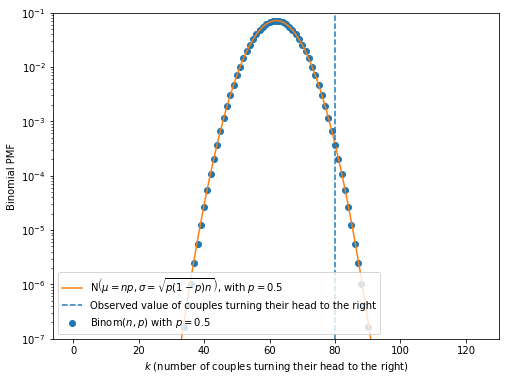

In [41]:
f,a = plt.subplots(figsize=(8,6))
a.scatter(ks,ps, label='Binom$(n,p)$ with $p=0.5$')
a.plot(x,p_norm,c='C1',label=r'N$\left(\mu=n p,\sigma = \sqrt{p(1-p)n}\right)$, with $p=0.5$')
a.set_xlabel(r'$k$ (number of couples turning their head to the right)')
a.set_ylabel('Binomial PMF')
a.set_yscale('log')
a.axvline(80,linestyle='--', label='Observed value of couples turning their head to the right')
a.set_ylim(1e-7,1e-1)
a.legend()

### p-value

**Definition:**
Probability under $H_{0}$ of obtaining a result equal to or more extreme than what was observed

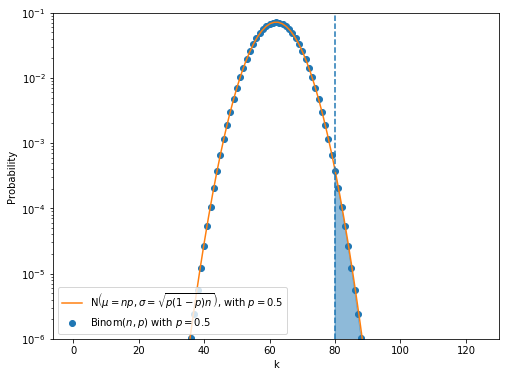

In [6]:
f,a = plt.subplots(figsize=(8,6))
a.scatter(ks,ps, label='Binom$(n,p)$ with $p=0.5$')
a.plot(x,p_norm,c='C1',label=r'N$\left(\mu=n p,\sigma = \sqrt{p(1-p)n}\right)$, with $p=0.5$')
a.set_xlabel('k')
a.set_ylabel('Probability')
a.set_yscale('log')
a.fill_between(ks,ps,where=((ps>=0) & (ks>=80)), color='C0', alpha=0.5)
a.axvline(80,linestyle='--')
a.set_ylim(1e-6,1e-1)
a.legend()

In [28]:
p_value_binomial = 1.0 - scipy.stats.binom.cdf(k=n_right-1, n=n_couples, p=0.5)
p_value_binomial

0.00078236701308487255

In [29]:
p_value_binomial = scipy.stats.binom.cdf(k=n_left, n=n_couples, p=0.5)
p_value_binomial

0.00078236701308483265

### $\chi^{2}(df=1)$ equivalent

In [31]:
chi2_val_from_p_value_binomial = scipy.stats.chi2.isf(p_value_binomial,df=1)
chi2_val_from_p_value_binomial

11.282604917490346

In [33]:
x = np.linspace(0.0, 15, 100)
chi2_pdf = scipy.stats.chi2.pdf(x, df=1)

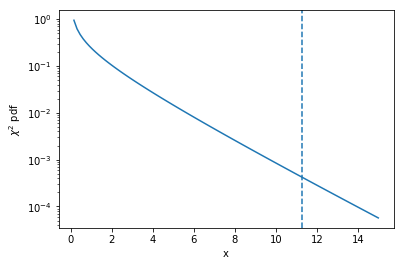

In [35]:
f,a = plt.subplots()
a.plot(x,chi2_pdf)
a.axhline(0.0,c='k',linestyle='--')
a.set_xlabel('x')
a.set_ylabel('$\chi^{2}$ pdf')
a.set_yscale('log')
a.axvline(chi2_val_from_p_value_binomial,linestyle='--')

--------

## Pearson's $\chi^{2}$ test for categorical data

- $i$: category index, corresponding to left or right

Value of the test statistic:

\begin{equation}
    S
    =
    \sum_{i}^{n_{category}}
    \frac{(n^{obs}_{i} - n p_{i})^{2}}{n p_{i}}
\end{equation}

\begin{equation}
    S
    =
    \frac{(n^{obs}_{left} - n p_{left} )^{2}}{n p_{left}}+
    \frac{(n^{obs}_{right} - n p_{right} )^{2}}{n p_{right}} 
\end{equation}

In [16]:
p_left = 0.5
p_right = 0.5

In [17]:
n_left_exp = n_couples*p_left
n_right_exp = n_couples*p_right

### Value of the test statistics $S$

In [24]:
S = (n_left-n_left_exp)**2/n_left_exp + (n_right-n_right_exp)**2/n_right_exp
S

10.451612903225806

### $p$-value

In [25]:
p_value_Pearson_chi2 = 1.0 - scipy.stats.chi2.cdf(S, df=1)
p_value_Pearson_chi2

0.001225424070670722

Illustration of $S$ and the $p$-value

In [26]:
x = np.linspace(0.0, 15, 100)
chi2_pdf = scipy.stats.chi2.pdf(x, df=1)

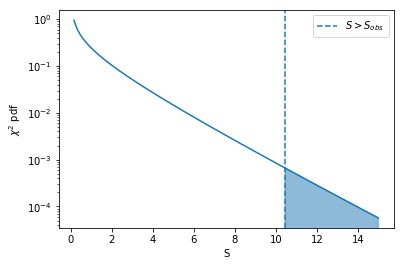

In [27]:
f,a = plt.subplots()
a.plot(x,chi2_pdf)
a.axhline(0.0,c='k',linestyle='--')
a.set_xlabel('S')
a.set_ylabel('$\chi^{2}$ pdf')
a.set_yscale('log')
a.axvline(S,linestyle='--', label='$S > S_{obs}$')
a.fill_between(x,chi2_pdf,where=((chi2_pdf>=0) & (x>=S)), color='C0', alpha=0.5)
a.legend();

-----------------------_

## $p$-value from the article

The article however quotes:
> Of 124 kissing pairs, 80 (64.5%) turned their heads to the right and 44 (35.5%) turned to the left (Fig. 1).
> This roughly 2:1 ratio is significantly different from 50% (**$\mathbf{\chi^{2} = 5.34}$, d.f.= 1, P<0.05**)

In [45]:
chi2_test_statistic_article = 5.34

In [46]:
p_value_article = 1.0 - scipy.stats.chi2.cdf(x=chi2_test_statistic_article, df=1)
p_value_article

0.020841473072792049

---------------_

## Comparison

In [47]:
print("Binomial equivalent chi2 test statistic: {}".format(chi2_val_from_p_value_binomial))
print("          Pearson's chi2 test statistic: {}".format(S))
print("          Article quoted test statistic: {}".format(chi2_test_statistic_article))

Binomial equivalent chi2 test statistic: 11.282604917490346
          Pearson's chi2 test statistic: 10.451612903225806
          Article quoted test statistic: 5.34


In [48]:
print("           Binomial p-value: {}".format(p_value_binomial))
print("Pearson's chi2 test p-value: {}".format(p_value_Pearson_chi2))
print("  Article recreated p-value: {}".format(p_value_article))

           Binomial p-value: 0.0007823670130848327
Pearson's chi2 test p-value: 0.001225424070670722
  Article recreated p-value: 0.02084147307279205


---------------

In [62]:
n_couples = 10000

In [68]:
n_right = 5101
n_left = 10000 - n_right

In [69]:
p_value_binomial = 1.0 - scipy.stats.binom.cdf(k=n_right-1, n=n_couples, p=0.5)
p_value_binomial

0.022212899522863205

In [70]:
n_left_exp = n_couples*p_left
n_right_exp = n_couples*p_right

In [71]:
S = (n_left-n_left_exp)**2/n_left_exp + (n_right-n_right_exp)**2/n_right_exp
Sn_left_exp = n_couples*p_left
n_right_exp = n_couples*p_right

In [72]:
p_value_Pearson_chi2 = 1.0 - scipy.stats.chi2.cdf(S, df=1)
p_value_Pearson_chi2

0.043383387535293583